In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('GOF.xlsx')
df.head()

,obs
0,4
1,3
2,8
3,7
4,4


In [ ]:
df.iloc[:, 0].mean()

3.841666666666667

In [ ]:
df.iloc[:, 0].median()

3.0

In [ ]:
max(df.iloc[:, 0])

10

In [ ]:
df.describe()

,obs
count,120.000000
mean,3.841667
std,2.145920
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,10.000000


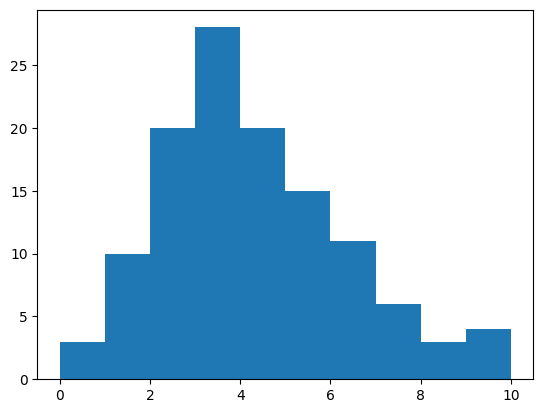

In [ ]:
plt.hist(df['obs'])
plt.show()

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, chisquare, chi2, uniform, poisson
from statsmodels.graphics.gofplots import qqplot

In [ ]:
grouped_df = pd.DataFrame()
grouped_df['Observed_freq'] = df.groupby('obs')['obs'].count()
grouped_df

,Observed_freq
obs,
0,3
1,10
2,20
3,28
4,20
5,15
6,11
7,6
8,3


In [ ]:
grouped_df['POISSON_PMF'] = poisson.pmf(k=grouped_df.index, mu =df['obs'].mean())
grouped_df

,Observed_freq,POISSON_PMF
obs,,
0,3,0.021458
1,10,0.082434
2,20,0.158341
3,28,0.202765
4,20,0.194739
5,15,0.149624
6,11,0.095801
7,6,0.052577
8,3,0.025248


In [ ]:
grouped_df['EXPECTED FREQ'] = grouped_df['POISSON_PMF'] * len(df)
grouped_df

,Observed_freq,POISSON_PMF,EXPECTED FREQ
obs,,,
0,3,0.021458,2.574937
1,10,0.082434,9.892050
2,20,0.158341,19.000979
3,28,0.202765,24.331809
4,20,0.194739,23.368675
5,15,0.149624,17.954932
6,11,0.095801,11.496144
7,6,0.052577,6.309193
8,3,0.025248,3.029727


In [ ]:
chisquare(grouped_df['Observed_freq'], np.sum(grouped_df['Observed_freq']) / np.sum(grouped_df['EXPECTED FREQ']) * grouped_df['EXPECTED FREQ'], ddof = 1)

Power_divergenceResult(statistic=26.027634243314466, pvalue=0.0010389244546200474)

In [ ]:
df1 = pd.read_csv('iitm_onlineDegree.csv')
df1.head(10)

,Gender,Preference
0,Female,Business
1,Female,Programming
2,Male,Business
3,Female,Statistics
4,Female,Programming
5,Male,Statistics
6,Female,Statistics
7,Male,Statistics
8,Female,Statistics
9,Female,Programming


In [ ]:
contigTab = pd.crosstab(df1.Gender, df1.Preference, margins=True)
contigTab

Preference,Business,Programming,Statistics,All
Gender,,,,
Female,175,58,200,433
Male,139,36,124,299
All,314,94,324,732


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
contab = np.array([contigTab.transpose()['Male'][0:3].values, contigTab.transpose()['Female'][0:3].values])
stats.chi2_contingency(contab)

Chi2ContingencyResult(statistic=2.662658927192708, pvalue=0.26412588203358844, dof=2, expected_freq=array([[128.25956284,  38.39617486, 132.3442623 ],
       [185.74043716,  55.60382514, 191.6557377 ]]))

In [ ]:
stats.chi2.ppf(1-0.05,df=2)

5.991464547107979